# 图像处理实验

这个笔记本用于实验和调试图像处理算法。

In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 添加项目根目录到路径
sys.path.append('..')

from src.utils.image_io import read_image, save_image
from src.utils.color_space import adjust_brightness, adjust_contrast, adjust_saturation
from src.utils.filters import gaussian_blur, bilateral_filter, unsharp_mask, edge_detection
import src.config as config

# # 设置matplotlib显示中文
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 1. 图像读取与显示

In [2]:
def display_images(images, titles, figsize=(15, 10)):
    """显示多张图像"""
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    
    if n == 1:
        axes = [axes]
    
    for i, (image, title) in enumerate(zip(images, titles)):
        if len(image.shape) == 2 or image.shape[2] == 1:  # 灰度图
            axes[i].imshow(image, cmap='gray')
        else:  # RGB图
            axes[i].imshow(image)
        
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

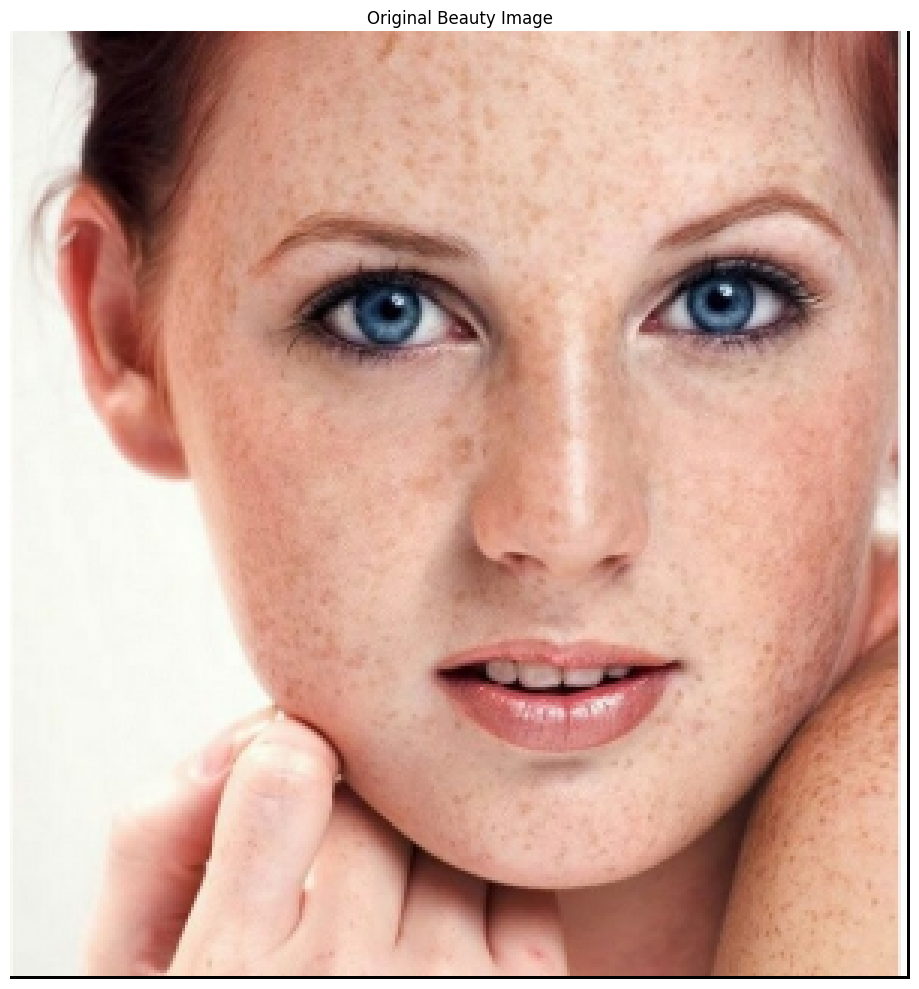

In [3]:
# 读取美女图像
beauty_img = read_image(config.BEAUTY_IMAGE_PATH)
display_images([beauty_img], ['Original Beauty Image'])

## 2. 美化效果实验

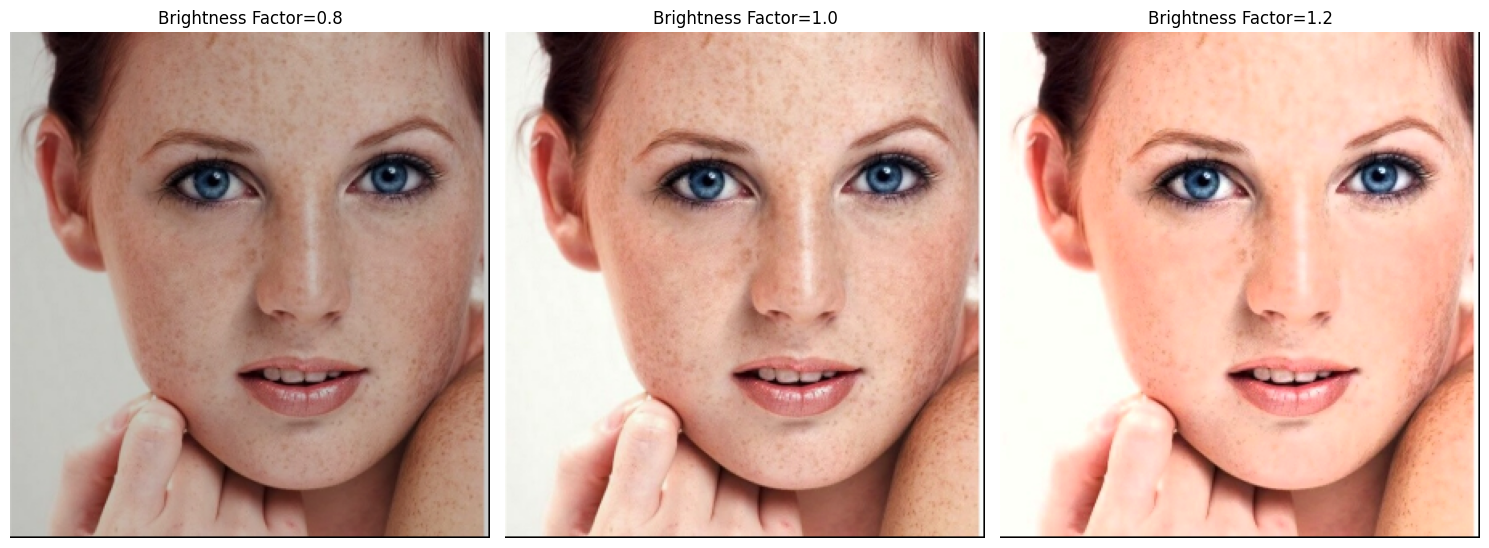

In [4]:
# 实验不同的亮度参数
brightness_factors = [0.8, 1.0, 1.2]
brightness_results = [adjust_brightness(beauty_img, factor) for factor in brightness_factors]
titles = [f'Brightness Factor={factor}' for factor in brightness_factors]
display_images(brightness_results, titles)

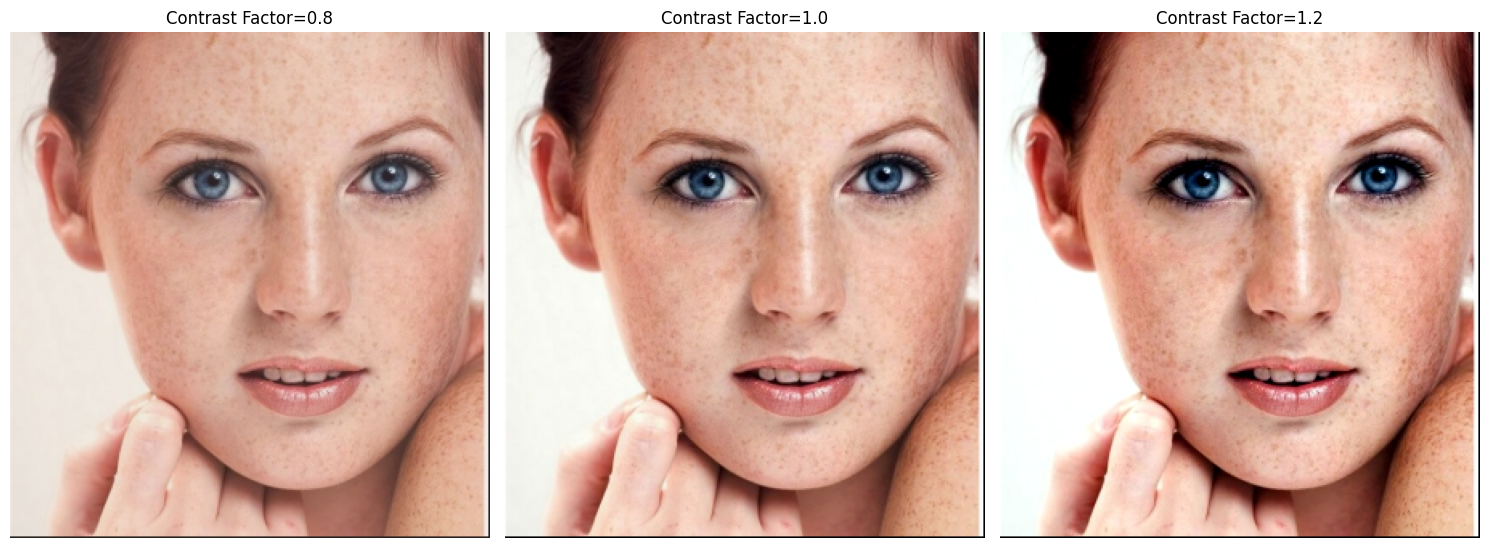

In [5]:
# 实验不同的对比度参数
contrast_factors = [0.8, 1.0, 1.2]
contrast_results = [adjust_contrast(beauty_img, factor) for factor in contrast_factors]
titles = [f'Contrast Factor={factor}' for factor in contrast_factors]
display_images(contrast_results, titles)

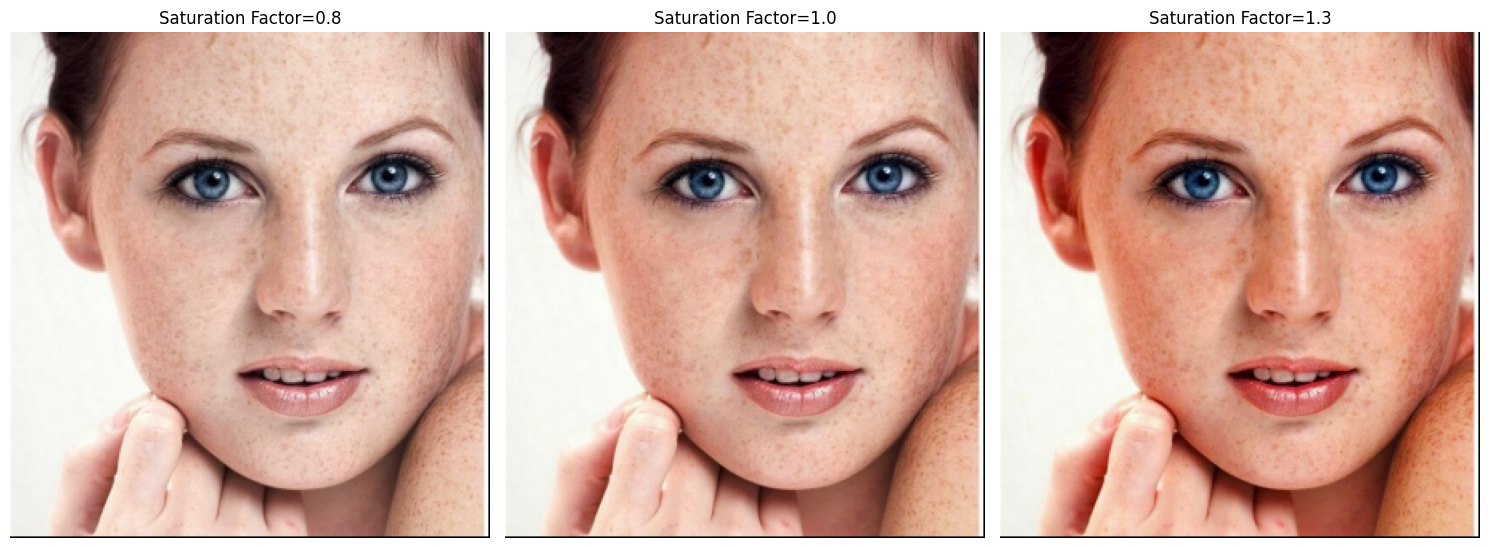

In [6]:
# 实验不同的饱和度参数
saturation_factors = [0.8, 1.0, 1.3]
saturation_results = [adjust_saturation(beauty_img, factor) for factor in saturation_factors]
titles = [f'Saturation Factor={factor}' for factor in saturation_factors]
display_images(saturation_results, titles)

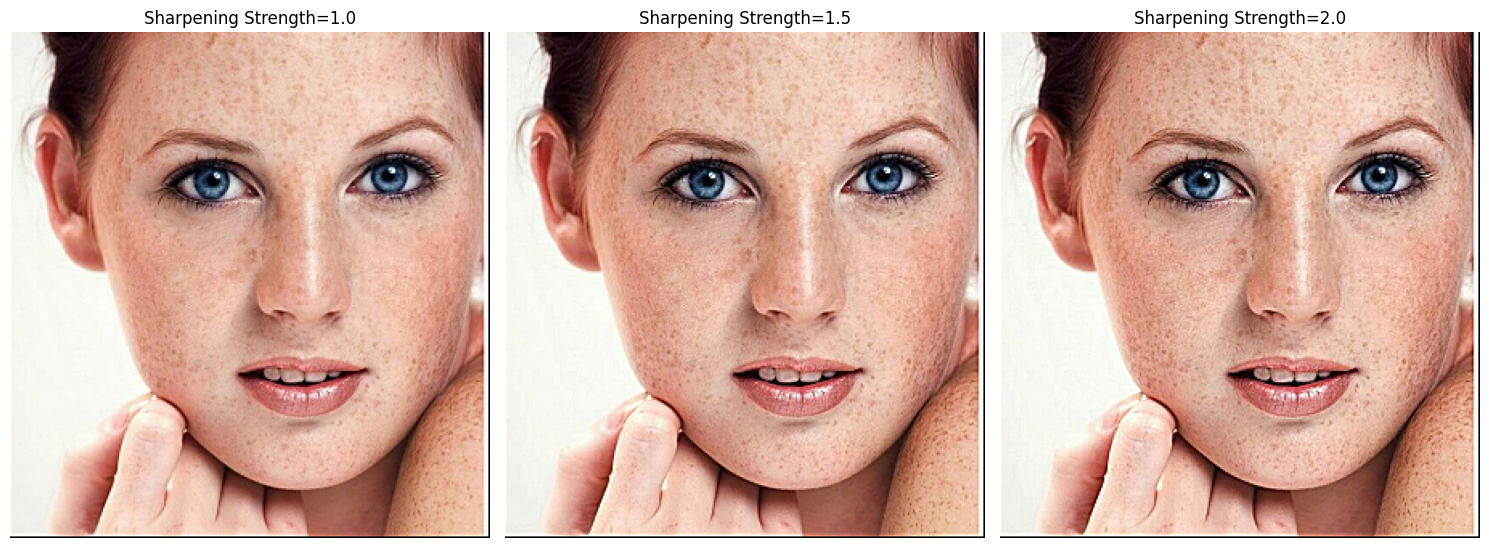

In [7]:
# 实验不同的锐化参数
sharpness_factors = [1.0, 1.5, 2.0]
sharpness_results = [unsharp_mask(beauty_img, kernel_size=5, strength=factor) for factor in sharpness_factors]
titles = [f'Sharpening Strength={factor}' for factor in sharpness_factors]
display_images(sharpness_results, titles)

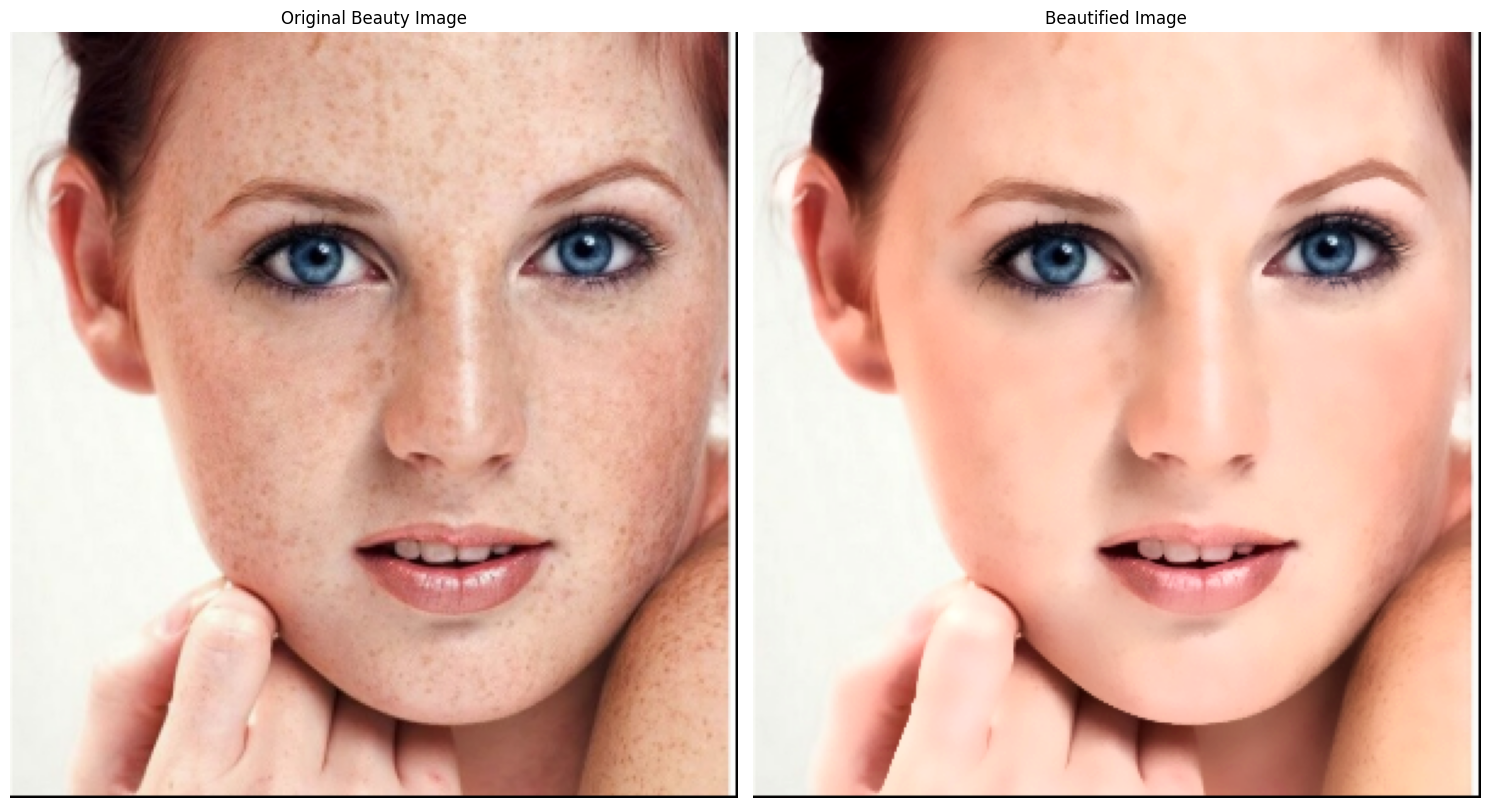

图像已保存至: ../beautified_beauty.jpg


In [32]:
from task1_beautification import remove_spots, skin_whitening, beautify_image, skin_detection
    
# # 显示皮肤检测结果
# skin_mask = skin_detection(beauty_img)
# display_images([beauty_img, cv2.cvtColor(skin_mask, cv2.COLOR_GRAY2RGB)], ['Original Beauty Image', 'Skin Detection Mask'])

# # 实验不同的去斑强度
# spot_removal_strengths = [0.5, 0.8, 1.0]
# spot_removal_results = [remove_spots(beauty_img, strength) for strength in spot_removal_strengths]
# titles = [f'Spot Removal Strength={strength}' for strength in spot_removal_strengths]
# display_images(spot_removal_results, titles)

# # 实验不同的美白参数
# whitening_results = [
#     skin_whitening(beauty_img, 1.1, 1.05, 0.95),
#     skin_whitening(beauty_img, 1.15, 1.1, 0.9),
#     skin_whitening(beauty_img, 1.2, 1.15, 0.85)
# ]
# titles = ['Mild Whitening', 'Medium Whitening', 'Strong Whitening']
# display_images(whitening_results, titles)

# 全流程美化实验
beautified_image = beautify_image(beauty_img, 
                                  remove_spots_strength=0.8,
                                  d=12, 
                                  sigma_color=75, 
                                  sigma_space=75,
                                  brightness_factor=1.15,
                                  contrast_factor=1.1,
                                  saturation_factor=0.95,
)
display_images([beauty_img, beautified_image], ['Original Beauty Image', 'Beautified Image'])

# 保存美化后的图像
save_image(beautified_image, '../beautified_beauty.jpg')

## 3. 苹果梨子融合实验

In [ ]:
# 读取苹果和橘子图像
apple_img = read_image(config.APPLE_IMAGE_PATH)
orange_img = read_image(config.orange_IMAGE_PATH)

# 调整橘子图像大小以匹配苹果图像
h, w = apple_img.shape[:2]
orange_img = cv2.resize(orange_img, (w, h))

display_images([apple_img, orange_img], ['苹果图像', '橘子图像'])

In [ ]:
# 实验不同的融合比例
alphas = [0.3, 0.5, 0.7]
blend_results = [cv2.addWeighted(apple_img, alpha, orange_img, 1-alpha, 0) for alpha in alphas]
titles = [f'融合比例={alpha}' for alpha in alphas]
display_images(blend_results, titles)

In [ ]:
# 边缘检测实验
apple_edges = edge_detection(apple_img, method='sobel')
orange_edges = edge_detection(orange_img, method='sobel')
display_images([apple_edges, orange_edges], ['苹果边缘', '橘子边缘'])